In [18]:
import numpy as np
import pprint
import matplotlib.pyplot as plt
import pandas as pd

A = np.array([[1,2],[3,1],[2,3]])
pp = pprint.PrettyPrinter()

# Exercise 7.1.1 

#### (a): SVD and 1-Truncated SVD of A

In [6]:
u, sv, v = np.linalg.svd(A, full_matrices=False) # u, sv, v = left singular vector, singular values, right singular vector
print('Left singular vectors: {}\n Singular values: {}\n Right singular vector: {}'.format(u, sv, v))

u1 = u[:,0]
u1 = np.reshape(u1, (-1,1))

sv1 = sv[0]

v1 = v[0,:]
v1 = np.reshape(v1, (1,-1))
truncated_A = sv1*np.matmul(u1,v1)

print('\n1-Truncated SVD of A:')
pp.pprint(truncated_A)

Left singular vectors: [[-0.42426407  0.40824829]
 [-0.56568542 -0.81649658]
 [-0.70710678  0.40824829]]
 Singular values: [5.         1.73205081]
 Right singular vector: [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

1-Truncated SVD of A:
array([[1.5, 1.5],
       [2. , 2. ],
       [2.5, 2.5]])


#### (b): plot the rows of the data matrix A and the rows of its 1-truncated SVD A 1as points



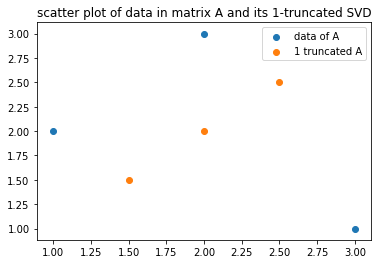

In [11]:
plt.scatter(A[:,0], A[:,1], label='data of A')
plt.scatter(truncated_A[:,0], truncated_A[:,1], label='1 truncated A')
plt.legend()
plt.title('scatter plot of data in matrix A and its 1-truncated SVD')
plt.show()




#### (c): Compare to the first Lemma about the k-truncated SVD.
#### Lemma: The rows of $$A_{k}$$ are the projections of the rows of A to the best-fit k-subspace $$V_{k}$$ spanned by the first k singular vectors of A

##### Answer: In above figure, the data points of 1-truncated A shows some large deviation from its original data points of A. However, this deviation(error) starts to decrease and vanish as the k grows. In current setting, if we set k=2 and compute its truncated SVD again then we can see that the data points from truncated A and A are perfectly matching.
   





# Exercise 7.1.2 

#### (a): For a given set of points and a line, the sum of the squared distances from the points to the line.


In [163]:
def computed_squared_distance(datas, line):
    """
    
    :param datas: 
    :param line:  
    :return: 
    """
    line = np.reshape(line, (-1,1))
   
    # projected point onto given line = np.matmul(np.matmul(datas, line), line.T))
    squared_distance = np.sum(np.square(datas - np.matmul(np.matmul(datas, line), line.T)))
    return squared_distance
    
    
def scatter_2D(datas, truncated_A, sub_v, j):
    plt.scatter(datas[:,0], datas[:,1], label='data of A', s=90)
    plt.scatter(truncated_A[:,0], truncated_A[:,1], label='{} truncated A'.format(j))
    
    if j == 1: # best fit 1-subspace
        max_data = max(datas[:,0])
        plt.plot(np.linspace(0,max_data , 10), np.linspace(0, max_data, 10)*sub_v[1]/sub_v[0], color='r', label='best fit 1-subspace')
    elif j ==2: # best fit 2-subspace
        max_data = max(datas[:,0])
        plt.plot(np.linspace(0,max_data , 10), np.linspace(0, max_data, 10)*sub_v[0][1]/sub_v[0][0], color='r', label='basis 2-subspace(1)')
        plt.plot(np.linspace(0,max_data , 10), np.linspace(0, max_data, 10)*sub_v[1][1]/sub_v[1][0], color='g', label='basis 2-subspace(2)')
    else:
        pass
        
    plt.legend()
    plt.title('scatter plot of data in matrix A and its {}-truncated SVD'.format(j))
    plt.show()

        


#### (b): For a given set of points, the best-fit1- and2-subspace to approximate the points

In [84]:
def find_best_fit_j_subspace(datas, j):
    
    u, sv, v = np.linalg.svd(datas, full_matrices=False) # u, sv, v = left singular vector, singular values, right singular vector
    
        
    sub_u = np.asarray([u[:,i] for i in range(j)])        
    
    sub_sv = sv[:j]
    
    sub_v = np.asarray([v[i,:] for i in range(j)])
    
    
    truncated_A = 0
    for i in range(j):
        truncated_A += sub_sv[i]*np.matmul(np.reshape(sub_u[i],(-1,1)),np.reshape(sub_v[i], (1,-1)))
            
    return (truncated_A, sub_v)


# Exercise 7.1.3
#### (a): Plot the points with the corresponding best-fit line so we can visually check the correctness of your routine

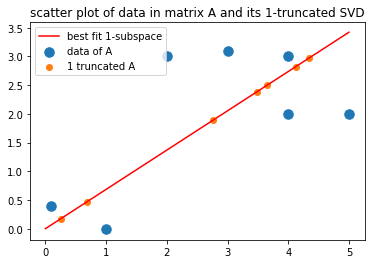

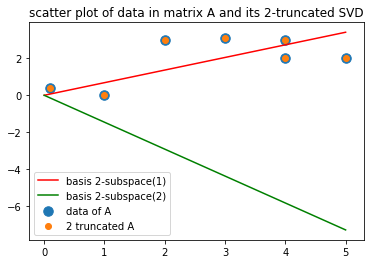

In [138]:
datas = pd.read_csv('07-2d.csv', header=None).to_numpy() # load data

# compute at plot best fit 1-subspace
truncated_A, sub_v = find_best_fit_j_subspace(datas,1)
scatter_2D(datas, truncated_A, sub_v.squeeze(),1)

# compute at plot best fit 2-subspace
truncated_A, sub_v = find_best_fit_j_subspace(datas,2)
scatter_2D(datas, truncated_A, sub_v.squeeze(),2)


    

# Exercise 7.1.3
#### (b): compare the sum of the squared distances of the best-fit line to the sum of the squared distances of the line given by $$y=\frac{2}{3}x$$ 




In [165]:
# compute at plot best fit 1-subspace
truncated_A, sub_v = find_best_fit_j_subspace(datas,1)

sub_v = sub_v.squeeze()
distance_best = computed_squared_distance(datas, sub_v)

direction_v = np.array((1,2/3)) # directional vector of the given line
direction_v = direction_v/np.linalg.norm(direction_v) # normalize the directional vector
distance_given_line = computed_squared_distance(datas, direction_v)

print('Squared distance of Best-fit: {}\n Squared distance of Given line y=2/3x: {}'.format(distance_best, distance_given_line))



Squared distance of Best-fit: 4.746603736992212
 Squared distance of Given line y=2/3x: 4.760769230769231


# Exercise 7.1.4 

#### Plot the data set and best-fit2-subspace given in07-3d.csv

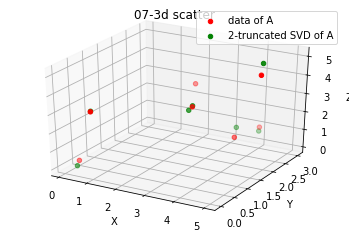

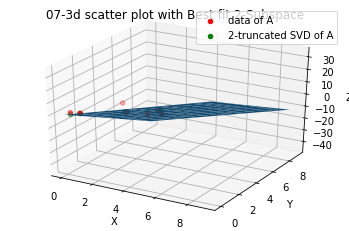

In [197]:
from mpl_toolkits.mplot3d import Axes3D

def plot_07_3d(datas, truncated_A, sub_v, normal, with_Subspace):
    # codes for plotting 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(datas[:,0], datas[:,1], datas[:,2], c='r', marker='o', label='data of A')
    ax.scatter(truncated_A[:,0], truncated_A[:,1], truncated_A[:,2], c='g', marker='o', label='2-truncated SVD of A')
    
    if with_Subspace:
        plt.title('07-3d scatter plot with Best fit 2-Subspace')
        xx, yy = np.meshgrid(range(10), range(10))
        z = (-normal[0] * xx - normal[1] * yy ) * 1. /normal[2]
        ax.plot_surface(xx, yy, z)
        
    else:
        plt.title('07-3d scatter')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    
    plt.show()
    
datas = pd.read_csv('07-3d.csv', header=None).to_numpy() # load data

# compute at plot best fit 2-subspace
truncated_A, sub_v = find_best_fit_j_subspace(datas,2)
normal = np.cross(sub_v[0], sub_v[1]) # compute the normal of best fit 2-subspace 
plot_07_3d(datas, truncated_A, sub_v, normal, False)
plot_07_3d(datas, truncated_A, sub_v, normal, True)